# Timeline Analysis : Covid-19 

In [55]:
##Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [56]:
df = pd.read_csv(r"C:\Users\Madan Kumar\Desktop\owid-covid-data - Copy.csv")
print(len(df))
df.head(3)

48594


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [57]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48594 entries, 0 to 48593
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         48312 non-null  object 
 1   continent                        48030 non-null  object 
 2   location                         48594 non-null  object 
 3   date                             48594 non-null  object 
 4   total_cases                      47979 non-null  float64
 5   new_cases                        47761 non-null  float64
 6   new_cases_smoothed               46979 non-null  float64
 7   total_deaths                     47979 non-null  float64
 8   new_deaths                       47761 non-null  float64
 9   new_deaths_smoothed              46979 non-null  float64
 10  total_cases_per_million          47697 non-null  float64
 11  new_cases_per_million            47697 non-null  float64
 12  new_cases_smoothed

In [5]:
df.isna()  # if anywhere there is True, it means that cell value is missing.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,False,False,False,False,False,False,True,False,False,True,...,False,True,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,False,False,True,...,False,True,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,True,...,False,True,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,True,...,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48589,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
48590,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
48591,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
48592,True,True,False,False,False,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [6]:
# Dealing with null values
df.isna().sum()
print("Total count of missing values in our dataset is: ",df.isna().sum().sum())

Total count of missing values in our dataset is:  421804


In [7]:
df=df.dropna()
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
3660,BGD,Asia,Bangladesh,2020-03-17,5.0,2.0,0.286,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
3661,BGD,Asia,Bangladesh,2020-03-18,8.0,3.0,0.714,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
3662,BGD,Asia,Bangladesh,2020-03-19,10.0,2.0,1.000,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
3663,BGD,Asia,Bangladesh,2020-03-20,10.0,0.0,1.000,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
3664,BGD,Asia,Bangladesh,2020-03-21,17.0,7.0,2.000,0.0,0.0,0.000,...,3523.984,14.8,298.003,8.38,1.0,44.7,34.808,0.8,72.59,0.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48016,ZWE,Africa,Zimbabwe,2020-09-24,7725.0,14.0,18.143,227.0,1.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
48017,ZWE,Africa,Zimbabwe,2020-09-25,7752.0,27.0,17.000,227.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
48018,ZWE,Africa,Zimbabwe,2020-09-26,7787.0,35.0,20.000,227.0,0.0,0.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
48019,ZWE,Africa,Zimbabwe,2020-09-27,7803.0,16.0,18.714,227.0,0.0,0.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [8]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,3.929000e+03,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,...,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,1.207396e+05,2294.196233,2217.510305,3482.922118,55.525579,54.206875,994.205978,15.418446,14.996794,27.472320,...,7597.812889,19.162637,260.668172,6.797610,3.834996,30.571163,51.934137,1.455673,69.126279,0.625902
std,5.026867e+05,9949.281278,9674.912922,11914.449026,175.189648,166.381244,1988.288075,32.947032,27.957010,73.362017,...,6203.394484,21.082998,84.496078,2.596104,2.823851,15.931187,29.527735,1.313721,5.149430,0.103691
min,2.000000e+00,0.000000,0.143000,0.000000,0.000000,0.000000,0.016000,0.000000,0.002000,0.000000,...,1095.042000,0.100000,109.861000,1.820000,0.300000,7.700000,7.960000,0.300000,60.850000,0.437000
25%,9.260000e+02,9.000000,13.000000,12.000000,0.000000,0.143000,31.805000,0.423000,0.689000,0.562000,...,2442.804000,2.200000,200.380000,4.610000,1.200000,20.400000,24.651000,0.700000,64.130000,0.562000
50%,5.206000e+03,134.000000,135.429000,77.000000,2.000000,2.000000,158.598000,3.475000,3.592000,3.131000,...,5591.597000,14.800000,260.797000,7.110000,2.800000,29.100000,55.182000,1.300000,69.660000,0.608000
75%,4.259500e+04,810.000000,737.571000,809.000000,16.000000,16.000000,861.021000,15.953000,15.444000,15.883000,...,11188.744000,26.700000,307.846000,8.350000,6.300000,37.800000,79.287000,1.700000,73.600000,0.702000
max,6.145291e+06,97894.000000,93198.571000,96318.000000,2003.000000,1168.000000,11288.363000,1024.993000,212.173000,591.339000,...,24055.588000,71.400000,466.792000,13.060000,9.500000,76.100000,98.999000,6.700000,77.150000,0.800000


In [9]:
df.nunique()

iso_code                             24
continent                             4
location                             24
date                                214
total_cases                        3210
new_cases                          1523
new_cases_smoothed                 2465
total_deaths                       1435
new_deaths                          407
new_deaths_smoothed                 780
total_cases_per_million            3602
new_cases_per_million              2583
new_cases_smoothed_per_million     2996
total_deaths_per_million           2224
new_deaths_per_million              708
new_deaths_smoothed_per_million     925
new_tests                          3112
total_tests                        3910
total_tests_per_thousand           3298
new_tests_per_thousand              643
new_tests_smoothed                 3032
new_tests_smoothed_per_thousand     615
tests_per_case                     3702
positive_rate                       416
tests_units                           4


In [10]:
print(df.shape)  

(3929, 41)


In [11]:
df.count() #Used to count the number of rows

iso_code                           3929
continent                          3929
location                           3929
date                               3929
total_cases                        3929
new_cases                          3929
new_cases_smoothed                 3929
total_deaths                       3929
new_deaths                         3929
new_deaths_smoothed                3929
total_cases_per_million            3929
new_cases_per_million              3929
new_cases_smoothed_per_million     3929
total_deaths_per_million           3929
new_deaths_per_million             3929
new_deaths_smoothed_per_million    3929
new_tests                          3929
total_tests                        3929
total_tests_per_thousand           3929
new_tests_per_thousand             3929
new_tests_smoothed                 3929
new_tests_smoothed_per_thousand    3929
tests_per_case                     3929
positive_rate                      3929
tests_units                        3929


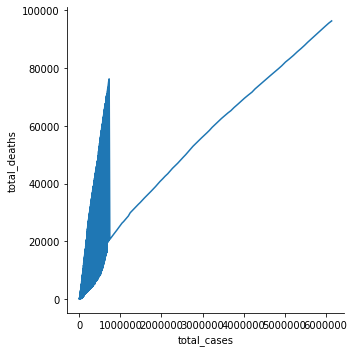

In [31]:
sns.relplot(x="total_cases", y="total_deaths",kind="line",data=df)

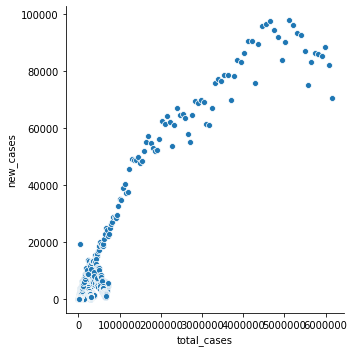

In [32]:
sns.relplot(x="total_cases", y="new_cases",data=df)

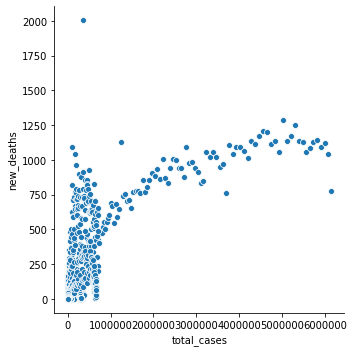

In [33]:
sns.relplot(x="total_cases", y="new_deaths",data=df)

In [34]:
df1=df[["date","total_cases","new_cases","total_deaths","new_tests","total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
3660,2020-03-17,5.0,2.0,0.0,39.0,381.0
3661,2020-03-18,8.0,3.0,0.0,46.0,427.0
3662,2020-03-19,10.0,2.0,0.0,36.0,463.0
3663,2020-03-20,10.0,0.0,0.0,36.0,499.0
3664,2020-03-21,17.0,7.0,0.0,65.0,564.0


In [35]:
df1.mean()

total_cases     1.207396e+05
new_cases       2.294196e+03
total_deaths    3.482922e+03
new_tests       2.401859e+04
total_tests     1.240853e+06
dtype: float64

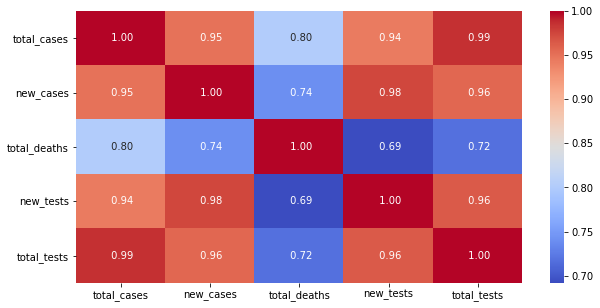

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),cbar=True,fmt =' .2f', annot=True, cmap='coolwarm')
plt.show()

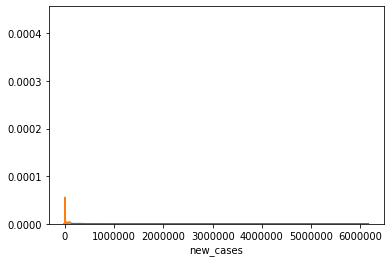

In [37]:
sns.distplot(df1['total_cases'])
sns.distplot(df1['new_cases']);

Text(0.5, 0, 'Month')

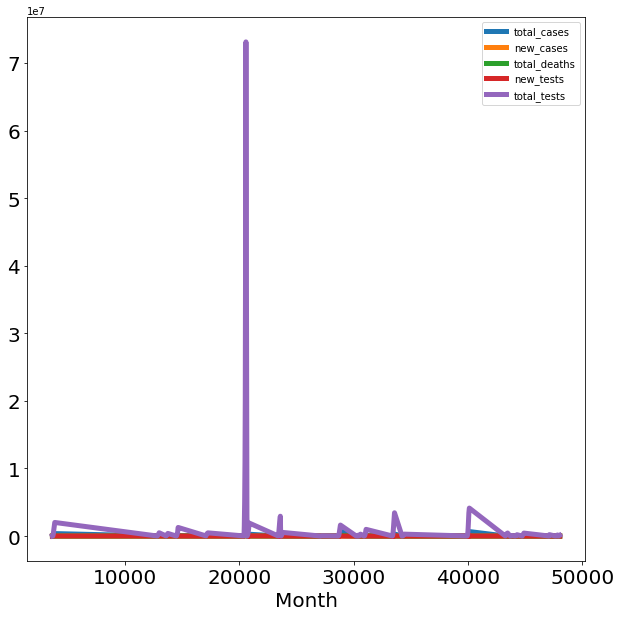

In [38]:
df1.plot(figsize = (10 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

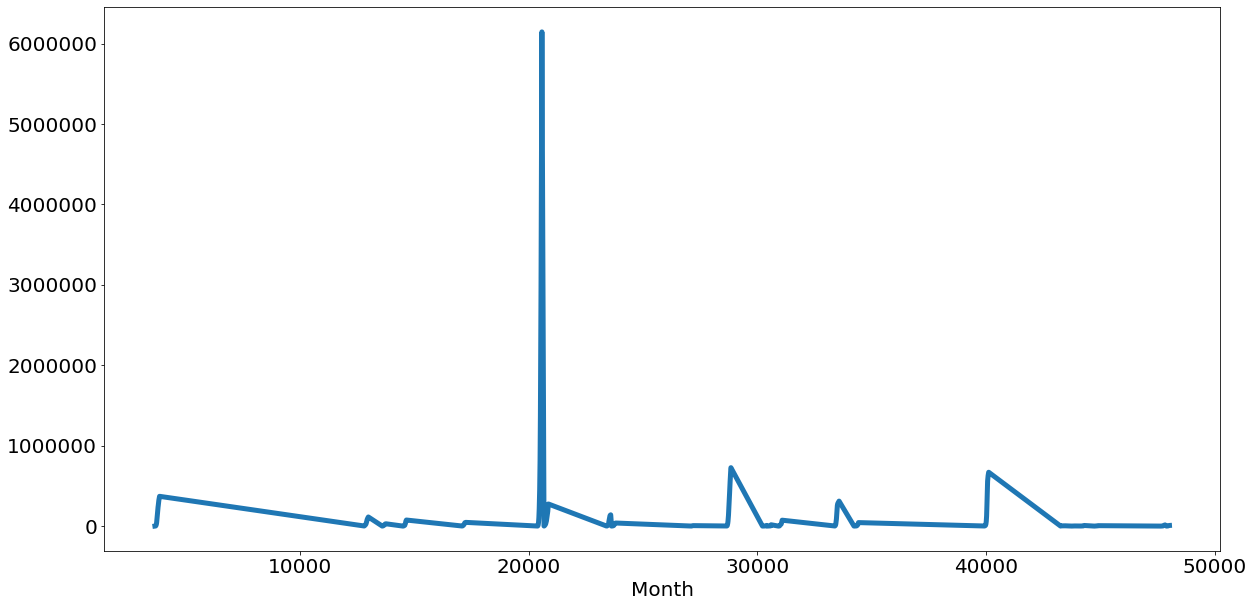

In [39]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

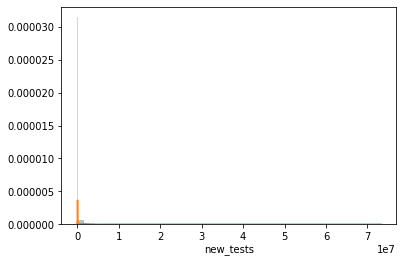

In [40]:
sns.distplot(df1['total_tests'])
sns.distplot(df1['new_tests']);

Text(0.5, 0, 'Month')

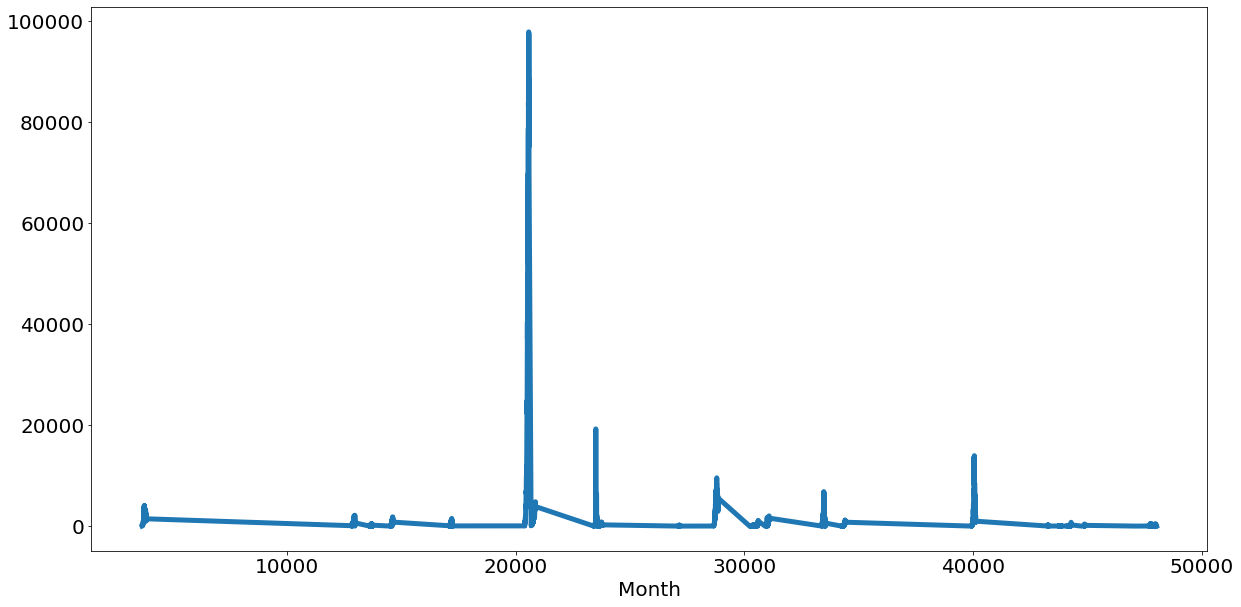

In [41]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20)

In [44]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)

plt.xlabel('Month', fontsize = 20

SyntaxError: unexpected EOF while parsing (<ipython-input-44-c9e55ba320dd>, line 3)

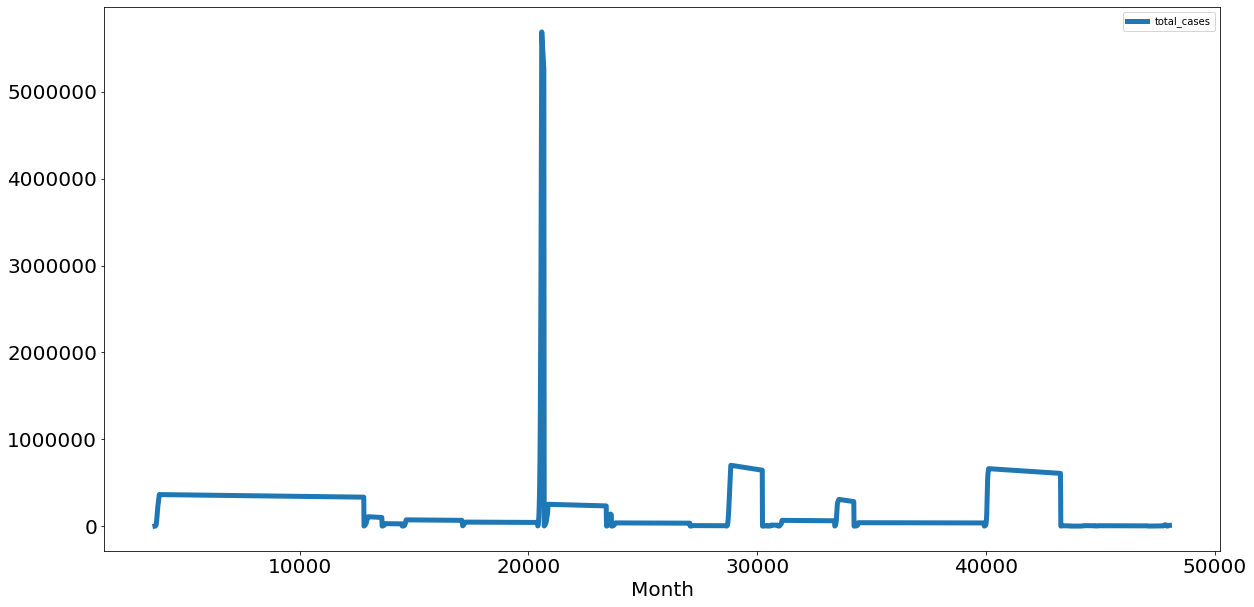

In [45]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


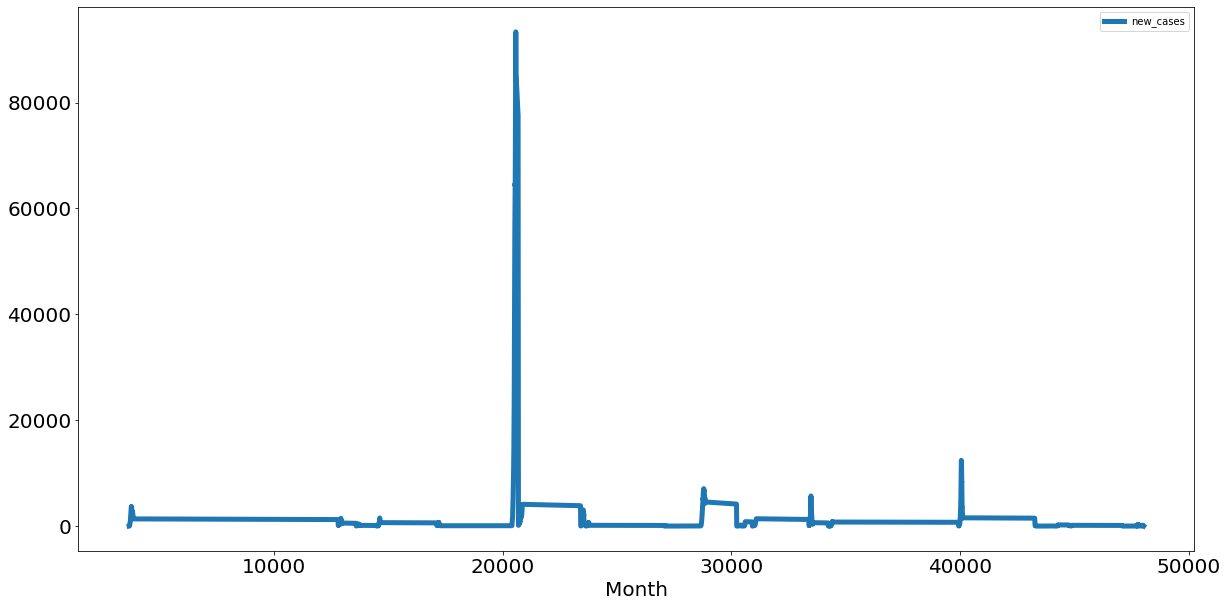

In [46]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

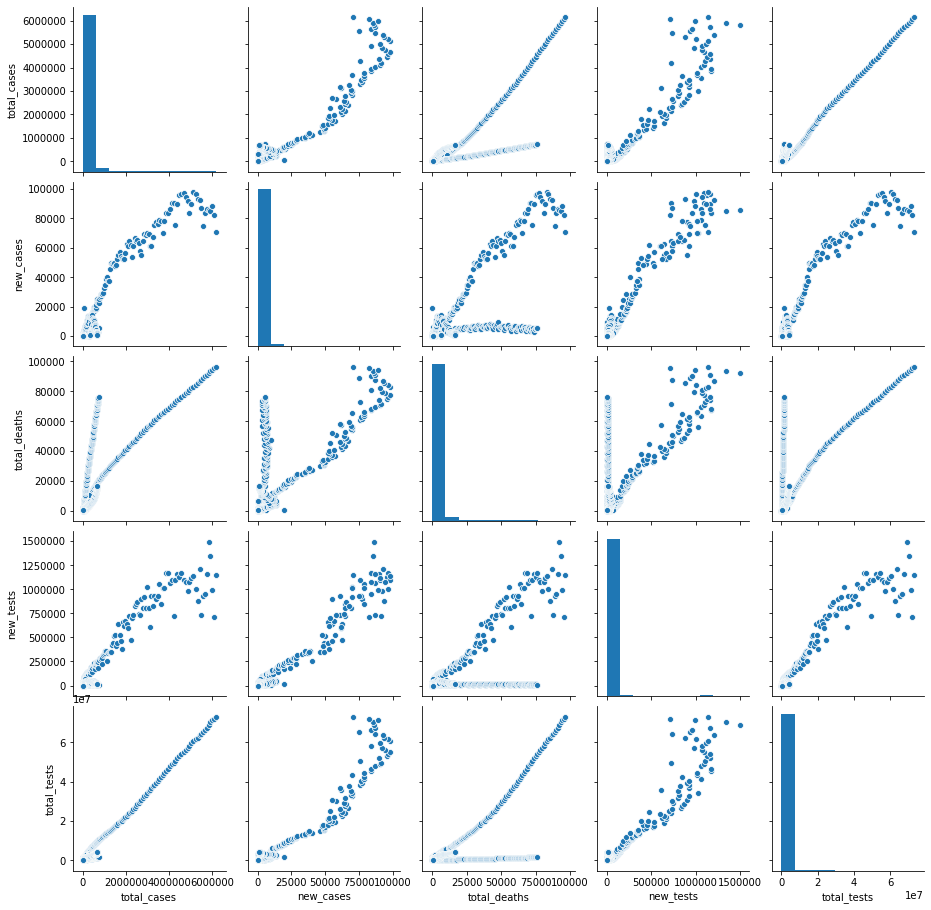

In [47]:
sns.pairplot(df1, size=2.5)

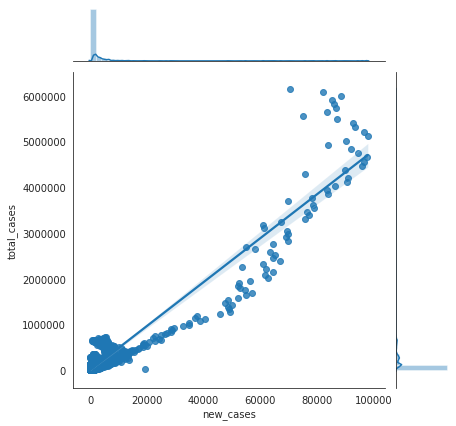

In [48]:
with sns.axes_style('white'):
    sns.jointplot("new_cases", "total_cases", data=df1, kind='reg')

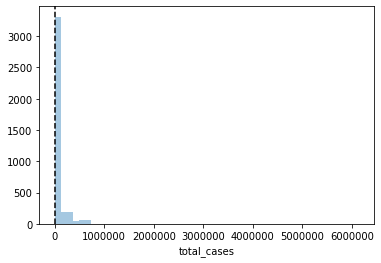

In [49]:
sns.distplot(df1['total_cases'], kde=False);
plt.axvline(0, color="k", linestyle="--");

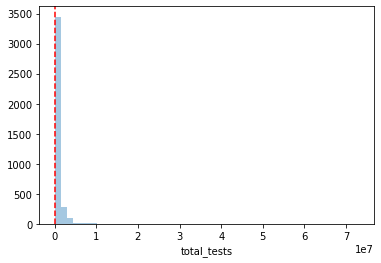

In [50]:
sns.distplot(df1['total_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");


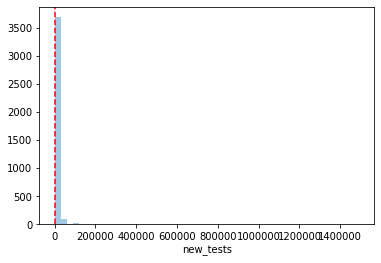

In [51]:
sns.distplot(df1['new_tests'], kde=False);
plt.axvline(0, color="r", linestyle="--");

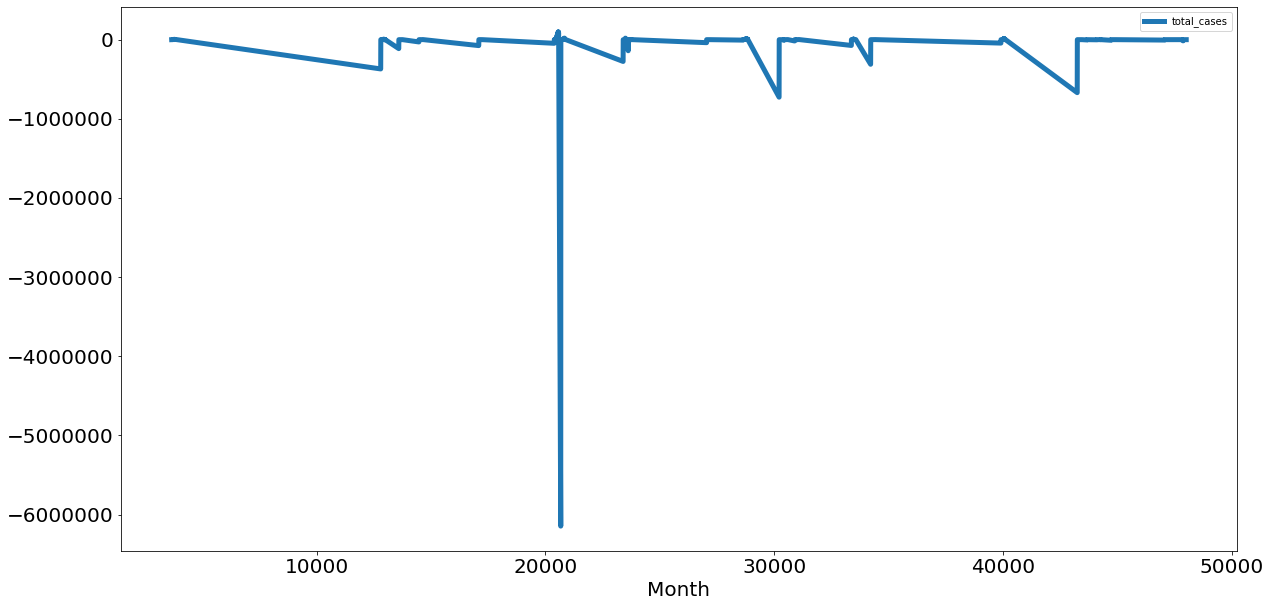

In [52]:
total_cases.diff().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20);


Text(0.5, 0, 'Month')

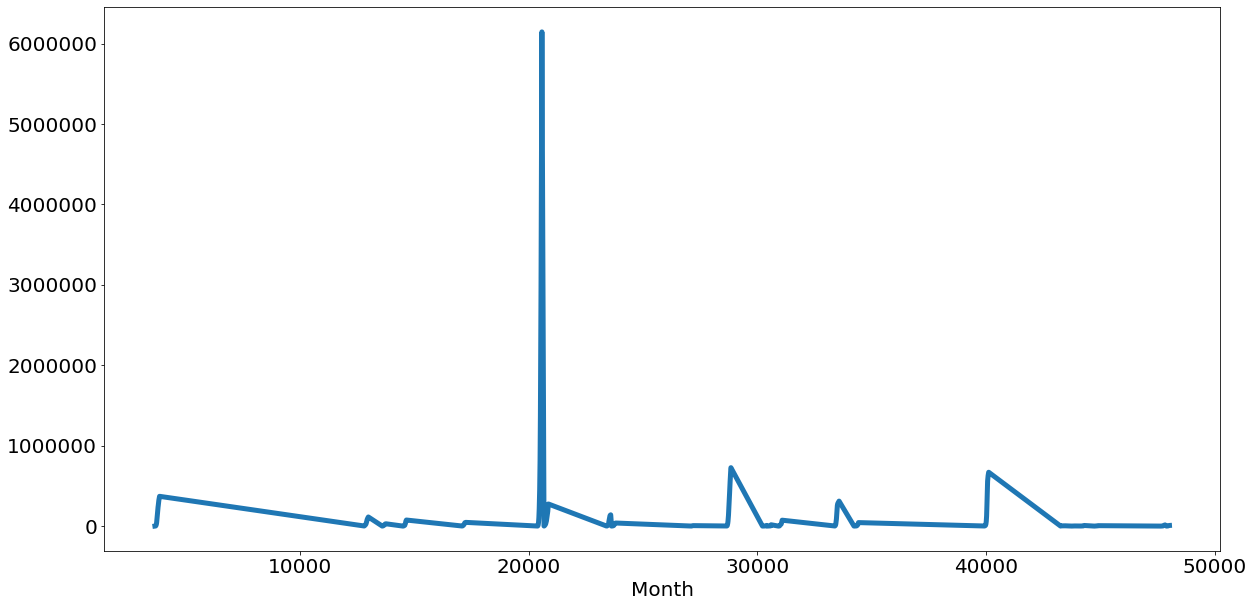

In [53]:
df1.total_cases.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Month",fontsize=20)

Text(0.5, 0, 'Month')

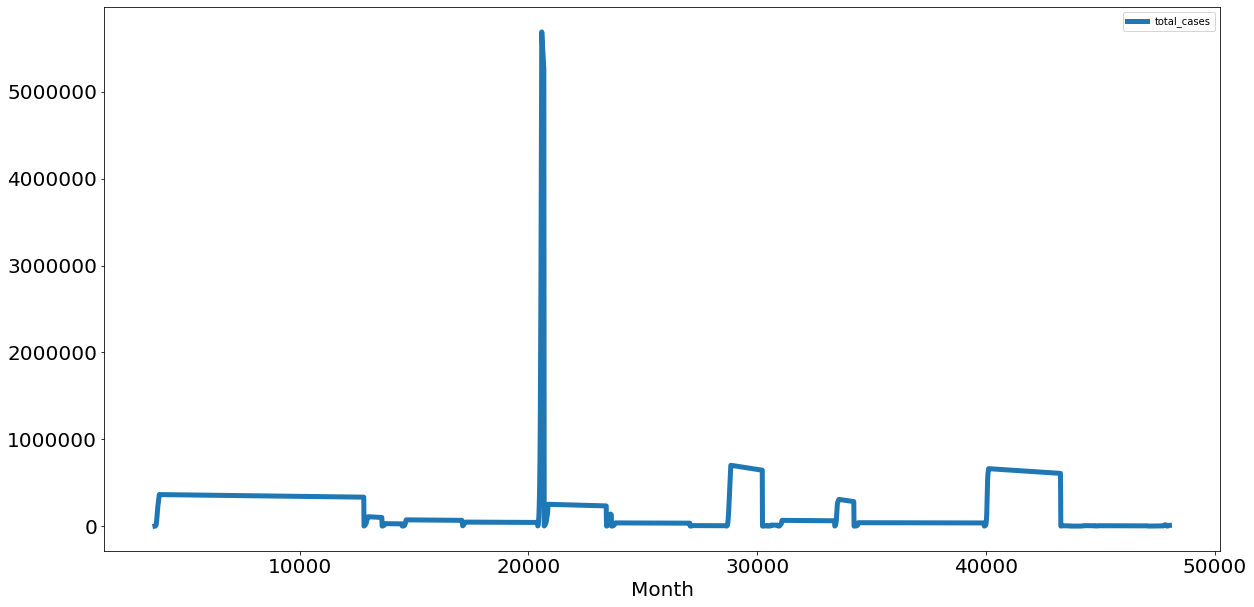

In [54]:
total_cases=df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Month",fontsize=20)